In [3]:
import os
import pickle
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# importing the "tarfile" module
import tarfile
  
# open file
file = tarfile.open('https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz')
  
# print file names
print(file.getnames())
  
# extract files
file.extractall('./data')
  
# close file
file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'

#### Data Conversion

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [5]:
trainData = unpickle('../data/train')

for item in trainData:
    print(item, type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [6]:
print(len(trainData['data']))
print(len(trainData['data'][0]))

50000
3072


In [7]:
print(np.unique(trainData['fine_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [8]:
print(np.unique(trainData['coarse_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [9]:
testData = unpickle('../data/test')
metaData = unpickle('../data/meta')
#metaData
print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [10]:
category = pd.DataFrame(metaData['coarse_label_names'], columns=['SuperClass'])

subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])
print(category.head())
print(subCategory.head())

             SuperClass
0       aquatic_mammals
1                  fish
2               flowers
3       food_containers
4  fruit_and_vegetables
        SubClass
0          apple
1  aquarium_fish
2           baby
3           bear
4         beaver


In [11]:
X_train = trainData['data']
X_train

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [12]:
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)

In [13]:
X_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

Image number selected : 43679
Shape of image : (32, 32, 3)
Image category number: 10
Image category name: Large_natural_outdoor_scenes
Image subcategory number: 33
Image subcategory name: Forest


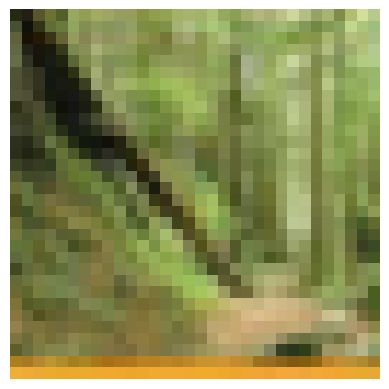

In [14]:
imageId = np.random.randint(0, len(X_train))
plt.plot()
plt.imshow(X_train[imageId])
plt.axis('off')
print("Image number selected : {}".format(imageId))
print("Shape of image : {}".format(X_train[imageId].shape))
print("Image category number: {}".format(trainData['coarse_labels'][imageId]))
print("Image category name: {}".format(category.iloc[trainData['coarse_labels'][imageId]][0].capitalize()))
print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

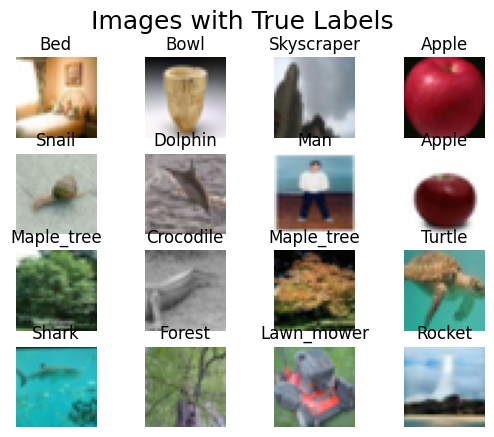

<Figure size 1500x1500 with 0 Axes>

In [15]:
num_row = 4
num_col = 4

imageId = np.random.randint(0, len(X_train), num_row * num_col)

fig, axes = plt.subplots(num_row, num_col)

plt.suptitle('Images with True Labels', fontsize=18)
plt.figure(figsize=(15,15))

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(X_train[imageId[k]])
        axes[i,j].set_title(subCategory.iloc[trainData['fine_labels'][imageId[k]]][0].capitalize())
        axes[i,j].axis('off')

In [16]:
#transforming the testing dataset
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
y_train = trainData['fine_labels']
y_test = testData['fine_labels']

In [17]:
from keras.utils import to_categorical
n_classes = 100

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

2023-01-02 22:10:49.847284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 22:10:50.416944: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-02 22:10:50.416991: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-02 22:10:52.256866: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [18]:
X_test

array([[[[199, 215, 249],
         [196, 211, 244],
         [195, 210, 243],
         ...,
         [216, 231, 250],
         [217, 231, 250],
         [224, 234, 252]],

        [[197, 210, 239],
         [195, 208, 238],
         [195, 210, 240],
         ...,
         [231, 243, 250],
         [233, 243, 250],
         [241, 245, 253]],

        [[222, 226, 246],
         [213, 220, 242],
         [209, 219, 243],
         ...,
         [243, 250, 251],
         [244, 249, 251],
         [250, 250, 253]],

        ...,

        [[ 72,  73,  99],
         [ 71,  74, 102],
         [ 74,  78, 108],
         ...,
         [220, 208, 217],
         [183, 168, 181],
         [155, 141, 150]],

        [[ 72,  75, 104],
         [ 76,  81, 111],
         [ 84,  89, 122],
         ...,
         [222, 212, 220],
         [187, 174, 192],
         [145, 132, 149]],

        [[ 80,  85, 118],
         [ 84,  90, 123],
         [ 85,  92, 127],
         ...,
         [217, 207, 215],
        

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building Model

In [20]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam

num_classes = 100

model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))

model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001, decay = 1e-6), metrics=['accuracy'])

2023-01-02 22:10:55.167057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-02 22:10:55.167109: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-02 22:10:55.167137: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (79bdeec0d656): /proc/driver/nvidia/version does not exist
2023-01-02 22:10:55.167371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


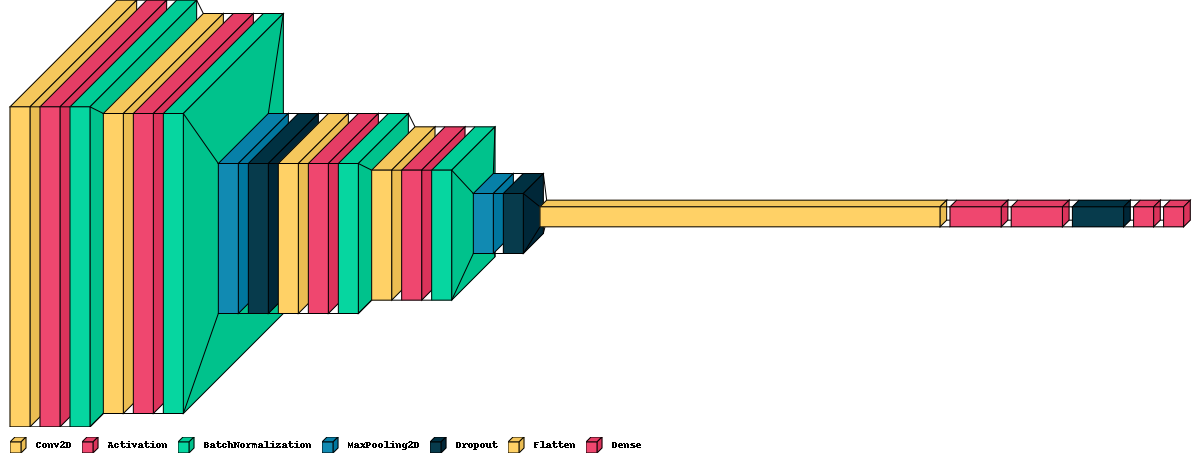

In [21]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
         
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

augmenter = ImageDataGenerator(rescale=1.0/255.,
                             rotation_range=20,
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             shear_range=0.1, 
                             zoom_range=0.2, 
                             fill_mode='nearest',
                             horizontal_flip=True)
rescalator=ImageDataGenerator(rescale=1.0/255.)

train_generator=augmenter.flow(X_train, y_train, batch_size=20)
valid_generator=rescalator.flow(X_valid, y_valid, batch_size=20)
test_generator=rescalator.flow(X_test, y_test, batch_size=20)

In [23]:
EPOCHS=50
batch_size=20
steps_per_epoch=train_generator.n//batch_size
validation_steps=valid_generator.n//batch_size

history = model.fit(train_generator,
                        steps_per_epoch=steps_per_epoch,
                        epochs=EPOCHS,
                        validation_data=valid_generator,
                        validation_steps=validation_steps)

Epoch 1/50
2000/2000 [==============================] - 120s 60ms/step - loss: 4.4622 - accuracy: 0.0489 - val_loss: 3.8413 - val_accuracy: 0.1307
Epoch 2/50
2000/2000 [==============================] - 119s 60ms/step - loss: 4.0258 - accuracy: 0.0999 - val_loss: 3.4794 - val_accuracy: 0.1812
Epoch 3/50
2000/2000 [==============================] - 119s 59ms/step - loss: 3.7899 - accuracy: 0.1319 - val_loss: 3.3006 - val_accuracy: 0.2116
Epoch 4/50
2000/2000 [==============================] - 118s 59ms/step - loss: 3.5866 - accuracy: 0.1586 - val_loss: 3.1649 - val_accuracy: 0.2355
Epoch 5/50
2000/2000 [==============================] - 118s 59ms/step - loss: 3.4174 - accuracy: 0.1894 - val_loss: 2.9748 - val_accuracy: 0.2671
Epoch 6/50
2000/2000 [==============================] - 118s 59ms/step - loss: 3.2637 - accuracy: 0.2128 - val_loss: 2.8377 - val_accuracy: 0.2887
Epoch 7/50
2000/2000 [==============================] - 119s 59ms/step - loss: 3.1304 - accuracy: 0.2385 - val_loss: 2

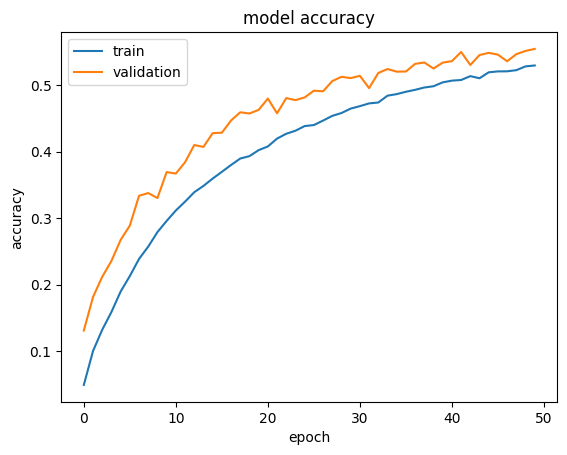

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

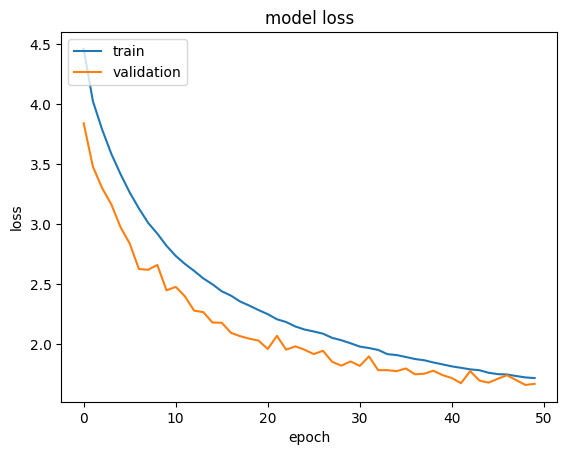

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
model.evaluate(X_train,y_train)

1250/1250 [==============================] - 20s 16ms/step - loss: 608.8530 - accuracy: 0.0570


[608.85302734375, 0.056974999606609344]

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 623.5164 - accuracy: 0.0527


[623.5164184570312, 0.05270000174641609]

In [28]:
import joblib
joblib.dump(filename="model.joblib",value='model')

['model.joblib']